## Redes Convolucionales para reconocimiento de imágenes

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Implementación de Redes Convolucionales en Keras" se propuso una implementación a través de *"Keras"* de una red convolucional para una base de datos que contiene imágenes de dígitos manuscritos. En este *notebook* se pretende evaluar el uso de *keras* al aplicar una red convolucional sobre un conjunto de imágenes más complejo, "Fashion MNIST". 

### Instrucciones generales

1. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

3. El archivo que suban debe poder ejecutarse en una imagen de Coursera cuando sea evaluado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Preparación de las variables: Se adaptan los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test. [15 puntos]

Estimación de un modelo utilizando redes neuronales convolucionales: Se estima el modelo usando una CNN, se establecen los parámetros y estructuras apropiadamente, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [45 puntos]

Calidad de la predicción: La arquitectura implementada posee un buen desempeño entre el nivel de precisión obtenido y el tiempo de ejecución. Asegúrese de no implementar una red excesivamente profunda probándola en los servidores que ofrece la plataforma Coursera, pues con estos realizamos la calificaciónde su solución. [40 puntos]


#### Problema

Fashion-MNIST es una base de datos de imágenes de artículos de la tienda de ropa Zalando, que consta de un set de entrenamiento de 60000 muestras y un set de test de 10000 muestras. Cada dato es una imagen en escala de grises de una prenda de vestir, asociada con una etiqueta de 10 clases.

Ustedes deben proponer el algoritmo para hacer la clasificación de las prendas con una red neuronal convolucional.

### Librerías a importar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

#Las siguientes dos líneas evitan la generación de "warnings" y "flags" al importar keras y tensorflow.
#Dichas advertencias no comprometen el funcionamiento del código.

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importación de keras


### 1. Preparación de las variables (15 puntos)

Adapte los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test.

In [6]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
# 1 Cargar el dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar los datos
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# shape en escala de grises
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Etiquetas a categorías
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de validación:", x_val.shape)
print("Tamaño del conjunto de test:", test_images.shape)

Tamaño del conjunto de entrenamiento: (48000, 28, 28, 1)
Tamaño del conjunto de validación: (12000, 28, 28, 1)
Tamaño del conjunto de test: (10000, 28, 28, 1)


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

- Se descargan los de datos de entrenamiento y prueba desde TensorFlow Keras Datasets utilizando el conjunto de datos Fashion MNIST, incluyendo imágenes y etiquetas.
- Los datos de las imágenes se normalizan dividiendo por 255. 
- Las imágenes se reestructuran para ajustarse al formato de escala de grises requerido por Keras, con una dimensión adicional para el canal de color.
- Las etiquetas se convierten en categorías para su uso en la clasificación.
- Se dividen los datos en conjuntos de entrenamiento y validación y test, con un tamaño en entrenamiento de 48000, validación de 12000 y test de 10000.


### 2. Estimación de un modelo utilizando redes neuronales convolucionales (45 puntos)

Estimen un modelo predictivo usando la muestra de entrenamiento y establezcan apropiadamente cada uno de los parámetros de la red.

In [3]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 27s 34ms/step - loss: 0.6480 - accuracy: 0.7655 - val_loss: 0.4148 - val_accuracy: 0.8468
Epoch 2/10
750/750 [==============================] - 25s 33ms/step - loss: 0.4287 - accuracy: 0.8463 - val_loss: 0.3393 - val_accuracy: 0.8729
Epoch 3/10
750/750 [==============================] - 24s 32ms/step - loss: 0.3699 - accuracy: 0.8662 - val_loss: 0.3012 - val_accuracy: 0.8857
Epoch 4/10
750/750 [==============================] - 24s 33ms/step - loss: 0.3371 - accuracy: 0.8785 - val_loss: 0.2925 - val_accuracy: 0.8886
Epoch 5/10
750/750 [==============================] - 24s 32ms/step - loss: 0.3100 - accuracy: 0.8867 - val_loss: 0.2822 - val_accuracy: 0.8937
Epoch 6/10
750/750 [==============================] - 24s 32ms/step - loss: 0.2885 - accuracy: 0.8950 - val_loss: 0.2602 - val_accuracy: 0.9025
Epoch 7/10
750/750 [==============================] - 24s 32ms/step - loss: 0.2721 - accuracy: 0.9029 - val_loss: 0.2795 - val_accuracy:

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

En este punto se implementó una red neuronal convolucional con las siguientes carácteristicas:
- Dos capas convolucionales de activación relu.
- Una capa de max pooling. 
- Una capa Flatten de aplanamiento. 
- Una capa densa con 128 neuronas con activación relu.
- Una capa Dropout cde abandono para reducir el sobreajuste con parámetro 0.5. 
- Una capa densa de salida con activación softmax para 10 categorías.

Para la compilación del modelo se usó el optimizador Adam y la pérdida de entropía cruzada categórica. 
El modelo se entrenó durante 10 épocas con un lote de 64 y con una precisión en el conjunto de validación del 91.21%.
La precisión del modelo en el conjunto de prueba fue del 90.48%, lo que indica un buen desempeño general y una capacidad adecuada para generalizar a nuevos datos.

### 3. Calidad de la predicción (40 puntos)

Evalúe el desempeño de su algoritmo con el set de _test_ y argumente sobre el nivel de precisión obtenido, tiempo de ejecución y la arquitectura de su red convolucional.

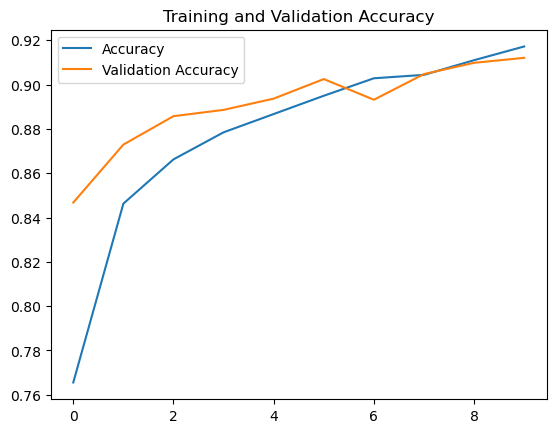

In [4]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

**Análisis y conclusiones**
- La precisión en el conjunto de prueba fue del 90.48%, lo cual indica un alto nivel de clasificación de imágenes.
- Cada época de entrenamiento tomó entre 24 y 27 segundos, el tiempo total de entrenamiento de alrededor de 4 minutos y medio para 10 épocas.
- La red neuronal convolucional implementada consta de dos capas convolucionales, dos capas de agrupamiento máximo (MaxPooling), una capa de aplanamiento (Flatten), una capa densa con 128 neuronas, y una capa de salida con activación softmax.
- La arquitectura de la red y los parámetros son adecuados para el conjunto de datos, encuentra equilibrio entre la precisión del modelo  el y tiempo de ejecución. La inclusión de la capa de abandono (Dropout) con un valor de 0.5 ayuda a prevenir el sobreajuste.
